### Goal: 
##### To build a text classification model to predict the artist from a piece of text

In [1]:
#To make this scrapper look legitimate, we spoof the headers we send along with our requests

import requests
from bs4 import BeautifulSoup
import pandas as pd

headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
    }

1. Download HTML pages --> 2. Get a list of song urls --> 3. Extract lyrics from song urls

In [2]:
BASE_URL = "https://www.lyrics.com"

def get_lyrics(path):
    new_url = BASE_URL + path
    r = requests.get(new_url)
    soup = BeautifulSoup(r.content , 'html.parser')
    return soup.find('h1').text, soup.find('pre').text

In [3]:
url = BASE_URL + "/album/3698421/HIStory%3A-Continues"

r = requests.get(url)
soup = BeautifulSoup(r.content , 'html.parser')
tags = soup.find_all('strong')

song_links = []
# iterate over each song entry and grab the link to the lyrics
for content in tags:
    link = content.find('a')
    if link and link['href'].startswith('/lyric'):
        song_links.append(link['href'])

In [4]:
songs = {}
# then we iterate over all the lyric links and get the lyrics for each song
# those lyrics are then stored in songs[song_title]
for l in song_links:
    song,lyrics = get_lyrics(l)
    songs[song] = lyrics

In [5]:
songs

{'Scream': "I'm tired of injustice, I'm tired of the schemes\nThe lies are disgusting, so what does it mean, damn it?\nYou're kicking me down, I got to get up\nAs jacked as it sounds, the whole system sucks, damn it\n\nPeek in the shadow, come into the light\nYou tell me I'm wrong, then you better prove you're right\nYou're selling out souls but I care about mine\nI've got to get stronger, and I won't give up the fight\n\nWith such confusion, don't it make you wanna scream? (Make you wanna scream?)\nYour bash abusing victimize within the scheme\nYou try to cope with every lie they scrutinize\nSomebody please have mercy, 'cause I just can't take it\n\nStop pressuring me, just stop pressuring me\nStop pressuring me, make me wanna scream\nStop pressuring me, just stop pressuring me\nStop pressuring me, make you just wanna scream\n\nI'm tired of you telling the story your way\nYou're causing confusion, you think it's okay, damn it\nYou keep changing up rules, while I keep playing the game\

In [6]:
print (songs['Scream'])

I'm tired of injustice, I'm tired of the schemes
The lies are disgusting, so what does it mean, damn it?
You're kicking me down, I got to get up
As jacked as it sounds, the whole system sucks, damn it

Peek in the shadow, come into the light
You tell me I'm wrong, then you better prove you're right
You're selling out souls but I care about mine
I've got to get stronger, and I won't give up the fight

With such confusion, don't it make you wanna scream? (Make you wanna scream?)
Your bash abusing victimize within the scheme
You try to cope with every lie they scrutinize
Somebody please have mercy, 'cause I just can't take it

Stop pressuring me, just stop pressuring me
Stop pressuring me, make me wanna scream
Stop pressuring me, just stop pressuring me
Stop pressuring me, make you just wanna scream

I'm tired of you telling the story your way
You're causing confusion, you think it's okay, damn it
You keep changing up rules, while I keep playing the game
I can't take it much longer, I thi

In [7]:
df = pd.DataFrame(list(songs.items()),columns = ['Title','Lyrics'])
df['Artist']='MichaelJackson'
df.head(2)

,Title,Lyrics,Artist
0,Scream,"I'm tired of injustice, I'm tired of the schem...",MichaelJackson
1,They Don't Care About Us,All I want to say is that they don't really ca...,MichaelJackson


**Pre-processing of data:** 
1. Tokenization (process of segmenting or separating text into words, clauses or sentences, & removal of punctuation) 
2. Stemming (reducing related words to a common stem)
3. Removal of Stop Words (removal of commonly used words unlikely to be useful for learning)

In [8]:
import re

#clean the data by removing all special chaacters

df['lyricss'] = df['Lyrics'].str.replace('\W', ' ')
#df['lyricss'] = df['Lyrics'].map(lambda x: re.sub(r'\W+', ' ', x))
df.head(4)

,Title,Lyrics,Artist,lyricss
0,Scream,"I'm tired of injustice, I'm tired of the schem...",MichaelJackson,I m tired of injustice I m tired of the schem...
1,They Don't Care About Us,All I want to say is that they don't really ca...,MichaelJackson,All I want to say is that they don t really ca...
2,Stranger in Moscow,"I was wandering in the rain\nMask of life, fee...",MichaelJackson,I was wandering in the rain Mask of life feel...
3,This Time Around,This time around I'll never get bit\nThough yo...,MichaelJackson,This time around I ll never get bit Though you...


In [9]:
df.drop('Lyrics', axis=1, inplace=True) #where 1 is the axis number (0 for rows and 1 for columns)
df.head(4)

,Title,Artist,lyricss
0,Scream,MichaelJackson,I m tired of injustice I m tired of the schem...
1,They Don't Care About Us,MichaelJackson,All I want to say is that they don t really ca...
2,Stranger in Moscow,MichaelJackson,I was wandering in the rain Mask of life feel...
3,This Time Around,MichaelJackson,This time around I ll never get bit Though you...


In [10]:
df['pre_clean'] = df['lyricss'].str.lower()
df.head(2)

,Title,Artist,lyricss,pre_clean
0,Scream,MichaelJackson,I m tired of injustice I m tired of the schem...,i m tired of injustice i m tired of the schem...
1,They Don't Care About Us,MichaelJackson,All I want to say is that they don t really ca...,all i want to say is that they don t really ca...


In [11]:
df.to_csv('MJ.csv', index=False)

### WordCloud

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [13]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

There are 12 observations and 4 features in this dataset. 



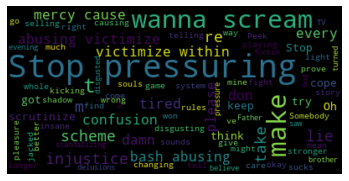

In [14]:
text = df.lyricss[0]


# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

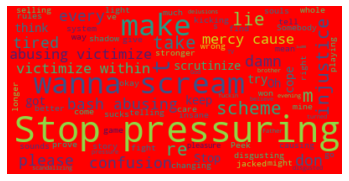

In [15]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="red").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("../Image/first_review.png")

There are 22092 words in the combination of all review.


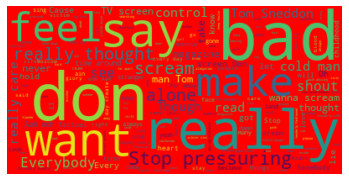

In [16]:
text = " ".join(review for review in df.lyricss)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["i", "m", "to", "a", "re", "me", "us", "ve", "s", "t", "ve", "re", "to", "is", "in"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="red").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("../Image/MJ.png")

**Build Corpus**

In [9]:
corpus = df["lyricss"].tolist()
corpus

['i m tired of injustice  i m tired of the schemes the lies are disgusting  so what does it mean  damn it  you re kicking me down  i got to get up as jacked as it sounds  the whole system sucks  damn it  peek in the shadow  come into the light you tell me i m wrong  then you better prove you re right you re selling out souls but i care about mine i ve got to get stronger  and i won t give up the fight  with such confusion  don t it make you wanna scream   make you wanna scream   your bash abusing victimize within the scheme you try to cope with every lie they scrutinize somebody please have mercy   cause i just can t take it  stop pressuring me  just stop pressuring me stop pressuring me  make me wanna scream stop pressuring me  just stop pressuring me stop pressuring me  make you just wanna scream  i m tired of you telling the story your way you re causing confusion  you think it s okay  damn it you keep changing up rules  while i keep playing the game i can t take it much longer  i t

**To do Next:** --> extract each each individual word and count most common --> Import nltk --> Build model
1. from collections import Counter
2. c = Counter(corpus)
3. print(c.most_common(3))

4. Convert text to numbers by applying the Bag Of Words method

In [10]:
from sklearn.feature_extraction.text import CountVectorizer 
import nltk

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
cv.fit(corpus)
out = cv.transform(corpus)
corpus

['i m tired of injustice  i m tired of the schemes the lies are disgusting  so what does it mean  damn it  you re kicking me down  i got to get up as jacked as it sounds  the whole system sucks  damn it  peek in the shadow  come into the light you tell me i m wrong  then you better prove you re right you re selling out souls but i care about mine i ve got to get stronger  and i won t give up the fight  with such confusion  don t it make you wanna scream   make you wanna scream   your bash abusing victimize within the scheme you try to cope with every lie they scrutinize somebody please have mercy   cause i just can t take it  stop pressuring me  just stop pressuring me stop pressuring me  make me wanna scream stop pressuring me  just stop pressuring me stop pressuring me  make you just wanna scream  i m tired of you telling the story your way you re causing confusion  you think it s okay  damn it you keep changing up rules  while i keep playing the game i can t take it much longer  i t

In [12]:
#Sparse Matrix

out.todense()

matrix([[0, 0, 3, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [13]:
out

<12x605 sparse matrix of type '<class 'numpy.int64'>'
	with 827 stored elements in Compressed Sparse Row format>

In [14]:
df = pd.DataFrame(out.todense(), columns=cv.get_feature_names())
df.head(3)

,aah,abandoned,abusing,accuse,actual,adventurous,aggravation,agony,aiming,ain,...,words,world,worry,wouldn,writing,wrong,yeah,yesterday,young,youth
0,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,2,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#Tf-Idf (Normalization)

from sklearn.feature_extraction.text import TfidfTransformer

tf = TfidfTransformer()
transformed = tf.fit_transform(out)
transformed

tdf = pd.DataFrame(transformed.todense(), columns=cv.get_feature_names())
tdf.round(4)

,aah,abandoned,abusing,accuse,actual,adventurous,aggravation,agony,aiming,ain,...,words,world,worry,wouldn,writing,wrong,yeah,yesterday,young,youth
0,0.0000,0.0000,0.0791,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0179,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0298,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0298,0.0596,0.0000,0.0203,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0353,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0173,0.0000,0.0000,0.0000,0.0000,0.0000,0.0447,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0298,0.0000,0.0000,0.0000
4,0.5378,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0407,0.0000,0.0000,0.0000,0.0407,0.0000,0.0598,0.0000,0.0000
5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0631,0.0500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,0.0000,0.0000,0.0735,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0501,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2205
8,0.0000,0.0000,0.0000,0.0000,0.0895,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0513,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0424,0.0547,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0144,0.0729,0.0000,0.0000,0.0000


In [16]:
tdf.values

array([[0.        , 0.        , 0.0790751 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03530999, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.07192778,
        0.        ]])

5. Build and train a Naive Bayes classifier